In [17]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [18]:
file = h5py.File('../Testing_Auto_timestep/output_8k_Gadget//snap_258.hdf5', 'r')

In [19]:
file.keys()

<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType0']>

In [20]:
file['Parameters']

<HDF5 group "/Parameters" (0 members)>

In [21]:
file['PartType0'].keys()

<KeysViewHDF5 ['Coordinates', 'Density', 'InternalEnergy', 'Masses', 'ParticleIDs', 'SmoothingLength', 'Velocities']>

In [22]:
coord = file['PartType0']['Coordinates']
coord

<HDF5 dataset "Coordinates": shape (8192, 3), type "<f4">

In [23]:
#with open('../Testing_Auto_timestep/Outputs_8k_my_code/00423.pkl', 'rb') as f:
#    data = pickle.load(f)
#    r = data['pos']

60877
60877


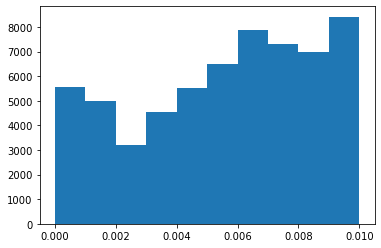

In [24]:
xxG = xx =  coord[:, 0]
yyG = yy = coord[:, 1]
zzG = zz = coord[:, 2]

lst = []

arr = np.zeros(1)
mm = np.zeros(1)

for i in range(len(xx)):
    
    rr = ((xx[i]-xx)**2 + (yy[i]-yy)**2 + (zz[i]-zz)**2)**0.5
    rr = rr[rr != 0.]
    m_lt = np.where(rr < 0.01)[0]
    rr = rr[m_lt]

    arr = np.concatenate([arr, rr])
    mm = np.concatenate([mm, m_lt])

print(len(arr))
print(len(mm))

plt.hist(arr, bins=10);

In [25]:
with open('../Testing_Auto_timestep/Outputs_8k_my_code/00490.pkl', 'rb') as f:
    data = pickle.load(f)
    r = data['pos']

37941


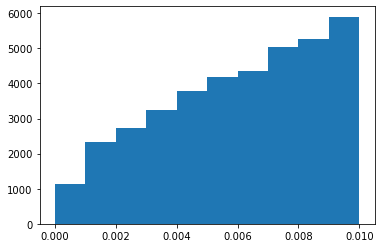

In [26]:
xx = r[:, 0]
yy = r[:, 1]
zz = r[:, 2]

arr = np.zeros(1)
nn = np.zeros(1)

for i in range(len(xx)):
    
    rr = ((xx[i]-xx)**2 + (yy[i]-yy)**2 + (zz[i]-zz)**2)**0.5
    rr = rr[rr != 0.]
    
    n_lt = np.where(rr < 0.01)[0]
    rr = rr[n_lt]

    arr = np.concatenate([arr, rr])
    nn = np.concatenate([nn, n_lt])

print(len(arr))

plt.hist(arr, bins=10);

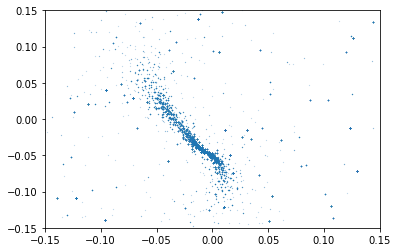

In [45]:
nn = nn[1:]
nn = [int(i) for i in nn] # to convert indices to INT

plt.scatter(xx[nn], yy[nn], s = 0.01);
xyrange = 0.15
plt.xlim(-xyrange, xyrange)
plt.ylim(-xyrange, xyrange);

#plt.xlim(0.1293, 0.12934)
#plt.ylim(-0.074, -0.07);

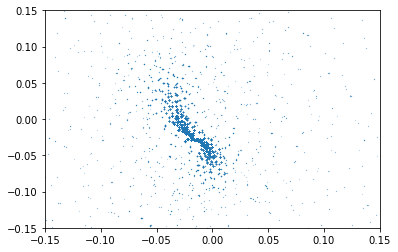

In [34]:
mm = mm[1:]
mm = [int(i) for i in mm] # to convert indices to INT

plt.scatter(xxG[mm], yyG[mm], s = 0.01)
xyrange = 0.15
plt.xlim(-xyrange, xyrange)
plt.ylim(-xyrange, xyrange);